<a href="https://colab.research.google.com/github/TranNgocXuanThanh/5loaihoa/blob/main/5loaihoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from os import listdir
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

# specify the folder here
folder = '/content/drive/MyDrive/5loaihoa/'

photos, labels = list(), list()

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('hong'):
        output = 0
    if file.startswith('sen'):
        output = 1
    if file.startswith('sung'):
        output = 2
    if file.startswith('cuc'):
        output = 3
    if file.startswith('mai'):
        output = 4
    if output is not None:
      photo = load_img(folder + file, target_size=(200, 200, 3))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)
photos = np.array(photos)
labels = np.array(labels)

# Normalize images
photos= photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,18)

# Save photos and labels to disk
save('/content/drive/MyDrive/5loaihoa', photos)
save('/content/drive/MyDrive/5loaihoa', labels)

# Define the model
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=60, epochs=10, verbose=1)

model.evaluate(photos,labels)


Epoch 1/10
7/7 [==============================] - 4s 457ms/step - loss: 5.2181 - accuracy: 0.2482
Epoch 2/10
7/7 [==============================] - 3s 439ms/step - loss: 1.8894 - accuracy: 0.4161
Epoch 3/10
7/7 [==============================] - 3s 438ms/step - loss: 1.3307 - accuracy: 0.5961
Epoch 4/10
7/7 [==============================] - 3s 446ms/step - loss: 1.0350 - accuracy: 0.6715
Epoch 5/10
7/7 [==============================] - 3s 444ms/step - loss: 0.8512 - accuracy: 0.7056
Epoch 6/10
7/7 [==============================] - 3s 444ms/step - loss: 0.8149 - accuracy: 0.7494
Epoch 7/10
7/7 [==============================] - 3s 444ms/step - loss: 0.6812 - accuracy: 0.8054
Epoch 8/10
7/7 [==============================] - 3s 450ms/step - loss: 0.5673 - accuracy: 0.7835
Epoch 9/10
7/7 [==============================] - 3s 449ms/step - loss: 0.4439 - accuracy: 0.8540
Epoch 10/10
13/13 [==============================] - 1s 55ms/step - loss: 0.2095 - accuracy: 0.9294


[0.2095056176185608, 0.9294403791427612]

In [11]:
model.save('5loaihoa.h5')

In [12]:
classes = ['cuc','hong','sen','sung','mai']

1/1 [==============================] - 0s 25ms/step
[[0.33340085 0.51036954 0.06121449 0.03932886 0.01748829 0.00248035
  0.00405356 0.00252507 0.00272456 0.00215237 0.00465372 0.0061597
  0.00193853 0.00353028 0.00129028 0.00188141 0.00200752 0.0028006 ]]


'hong'

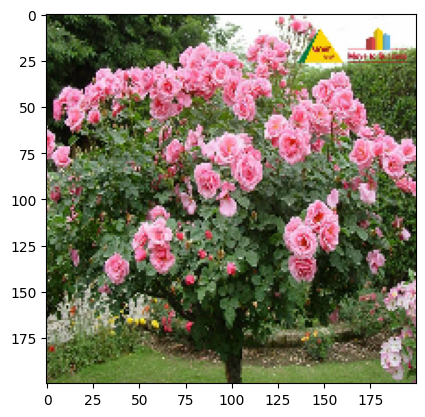

In [23]:
img = load_img('/content/drive/MyDrive/5loaihoa/hong (100).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]